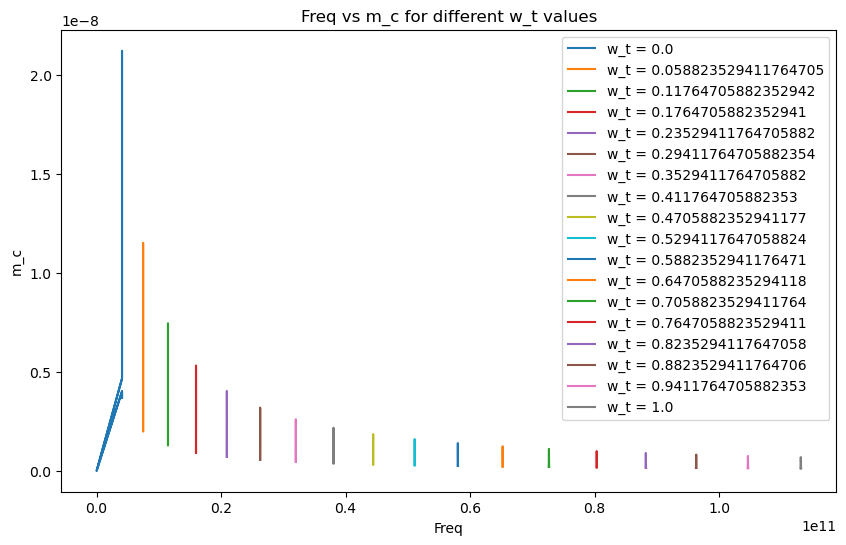

In [19]:
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# HDF5 文件路径
file_path = 'w_l_v_q.h5'

# 使用 pandas 读取 HDF5 文件中的 DataFrame
results_df = pd.read_hdf(file_path, 'mydata')

# 选择需要归一化的列
columns_to_normalize = ['w_t', 'l_t', 'Q', 'V']

# 初始化 MinMaxScaler 并对指定列进行归一化
scaler = MinMaxScaler()
results_df[columns_to_normalize] = scaler.fit_transform(results_df[columns_to_normalize])

# 获取所有不同的 w_t 值
unique_w_t = results_df['w_t'].unique()

# 设置画布大小
plt.figure(figsize=(10, 6))

# 遍历每个不同的 w_t 值
for w_t_value in unique_w_t:
    # 筛选出对应 w_t 的行
    subset = results_df[results_df['w_t'] == w_t_value]
    
    # 提取 freq 和 m_c 数据
    freq = subset['freq'].iloc[0]  
    m_c = subset['m_c'].iloc[0]
    
    # 绘制每组数据
    plt.plot(freq, m_c, label=f"w_t = {w_t_value}")

# 添加标题和标签
plt.title("Freq vs m_c for different w_t values")
plt.xlabel("Freq")
plt.ylabel("m_c")

# 显示图例
plt.legend()

# 显示图形
plt.show()


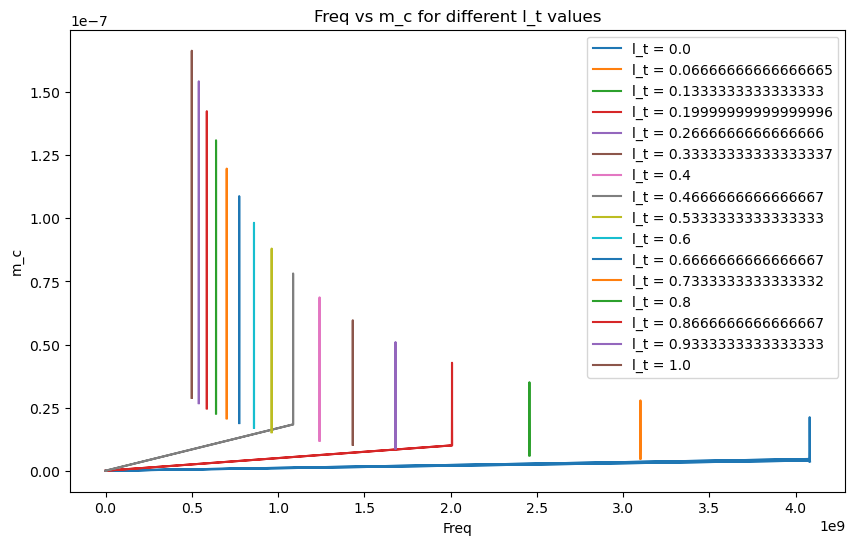

In [27]:
unique_l_t = results_df['l_t'].unique()

# 设置画布大小
plt.figure(figsize=(10, 6))

# 遍历每个不同的 w_t 值
for l_t_value in unique_l_t:
    # 筛选出对应 w_t 的行
    subset = results_df[results_df['l_t'] == l_t_value]
    
    # 提取 freq 和 m_c 数据
    freq = subset['freq'].iloc[0]  
    m_c = subset['m_c'].iloc[0]
    
    # 绘制每组数据
    plt.plot(freq, m_c, label=f"l_t = {l_t_value}")

# 添加标题和标签
plt.title("Freq vs m_c for different l_t values")
plt.xlabel("Freq")
plt.ylabel("m_c")

# 显示图例
plt.legend()

# 显示图形
plt.show()

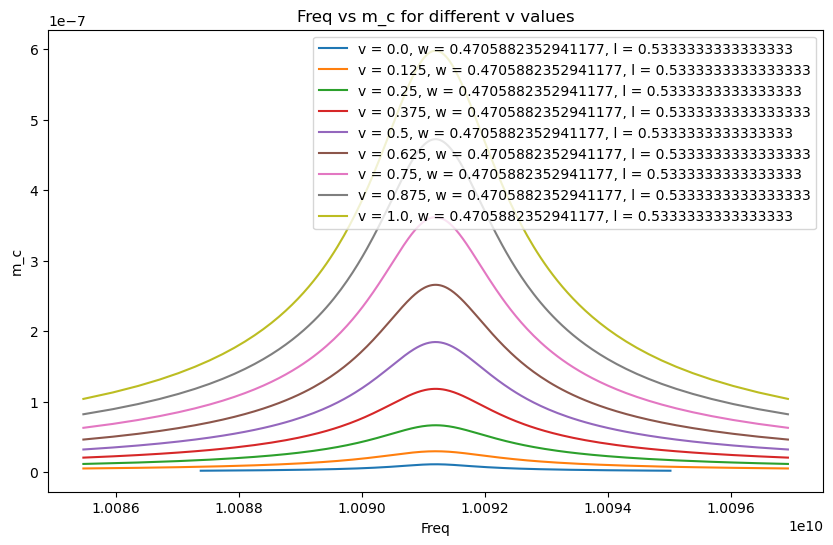

In [43]:
unique_v = results_df['V'].unique()

# 设置画布大小
plt.figure(figsize=(10, 6))


def find_closest_value(series, target_value):
    return series.iloc[(series - target_value).abs().argsort()[:1]]

# 遍历每个不同的 w_t 值
for v_value in unique_v:
    # 筛选出对应 w_t 的行
    subset = results_df[results_df['V'] == v_value]
    # 计算中间值
    mid_w = results_df['w_t'].median()
    mid_l = results_df['l_t'].median()
    closest_w = find_closest_value(subset['w_t'], mid_w).values[0]
    closest_l = find_closest_value(subset['l_t'], mid_l).values[0]
    
    mid_subset = subset[(subset['w_t'] == closest_w) & (subset['l_t'] == closest_l)]
    mid_subset = mid_subset[(mid_subset['freq'].apply(lambda x: all(val != 0 for val in x))) &
                             (mid_subset['m_c'].apply(lambda x: all(val != 0 for val in x)))]
    
    if not mid_subset.empty:
        # 提取 freq 和 m_c 数据
        freq = mid_subset['freq'].iloc[0]
        m_c = mid_subset['m_c'].iloc[0]
        
        # 绘制每组数据
        plt.plot(freq, m_c, label=f"v = {v_value}, w = {closest_w}, l = {closest_l}")


# 添加标题和标签
plt.title("Freq vs m_c for different v values")
plt.xlabel("Freq")
plt.ylabel("m_c")

# 显示图例
plt.legend()

# 显示图形
plt.show()

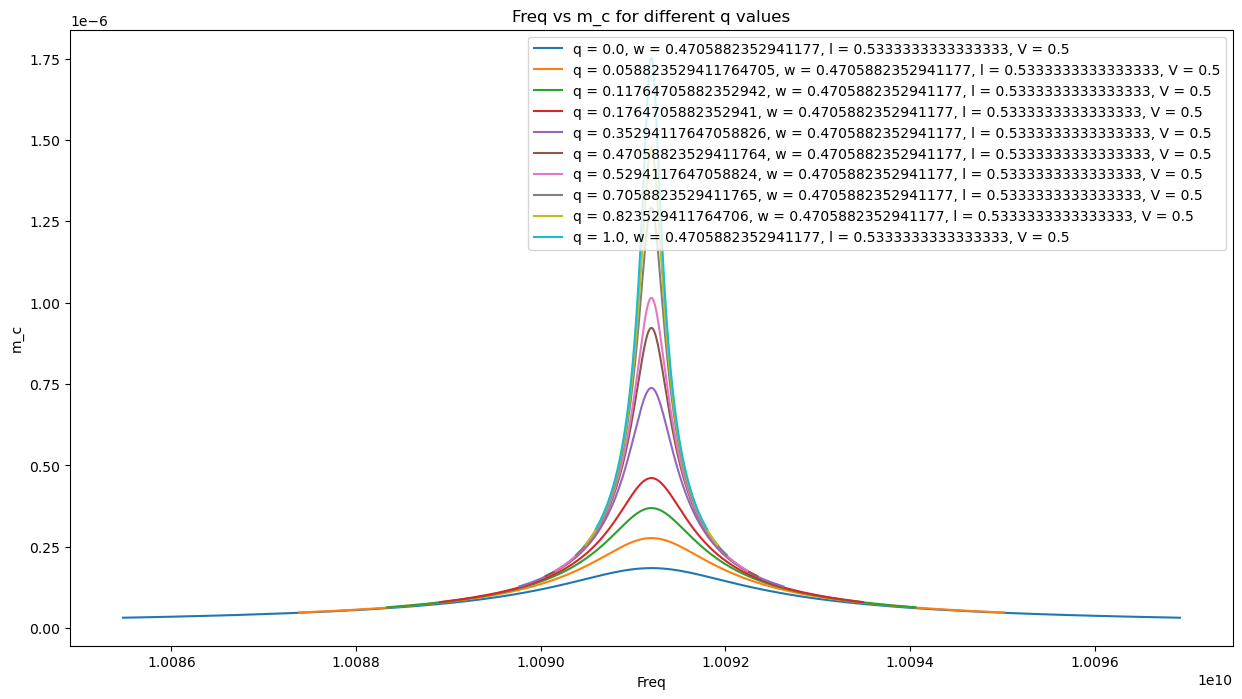

In [46]:
unique_q = results_df['Q'].unique()

# 设置画布大小
plt.figure(figsize=(15, 8))

# 遍历每个不同的 w_t 值
for q_value in unique_q:
    # 筛选出对应 w_t 的行
    subset = results_df[results_df['Q'] == q_value]
    # 计算中间值
    mid_w = results_df['w_t'].median()
    mid_l = results_df['l_t'].median()
    mid_V = results_df['V'].median()
    closest_w = find_closest_value(subset['w_t'], mid_w).values[0]
    closest_l = find_closest_value(subset['l_t'], mid_l).values[0]
    closest_V = find_closest_value(subset['V'], mid_V).values[0]

    mid_subset = subset[(subset['w_t'] == closest_w)  & (subset['l_t'] == closest_l) & (subset['V'] == closest_V)]
    mid_subset = mid_subset[(mid_subset['freq'].apply(lambda x: all(val != 0 for val in x))) &
                             (mid_subset['m_c'].apply(lambda x: all(val != 0 for val in x)))]
    
    if not mid_subset.empty:
        # 提取 freq 和 m_c 数据
        freq = mid_subset['freq'].iloc[0]
        m_c = mid_subset['m_c'].iloc[0]
        
        # 绘制每组数据
        plt.plot(freq, m_c, label=f"q = {q_value}, w = {closest_w}, l = {closest_l}, V = {closest_V}")


# 添加标题和标签
plt.title("Freq vs m_c for different q values")
plt.xlabel("Freq")
plt.ylabel("m_c")

# 显示图例
plt.legend()

# 显示图形
plt.show()

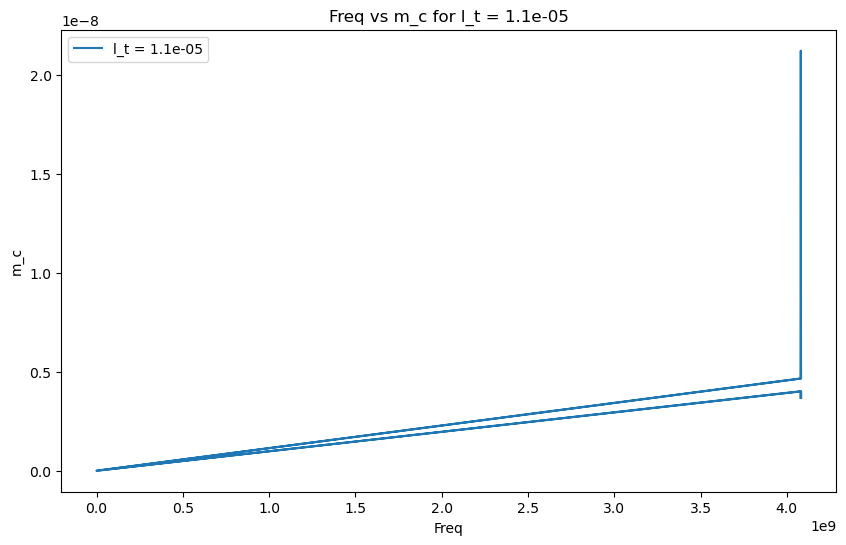

In [49]:
import matplotlib.pyplot as plt

# 筛选出 l_t 为 0 的数据行
subset = results_df[results_df['l_t'] == 0]

# 提取 freq 和 m_c
freq = subset['freq'].iloc[0]  # 假设 freq 是一个数组或列表
m_c = subset['m_c'].iloc[0]    # 假设 m_c 是一个数组或列表

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(freq, m_c, label="l_t = 1.1e-05")

# 添加标题和标签
plt.title("Freq vs m_c for l_t = 1.1e-05")
plt.xlabel("Freq")
plt.ylabel("m_c")

# 显示图例
plt.legend()

# 显示图形
plt.show()


In [10]:
# 获取所有不同的 w_t 值
freq.shape

(180,)